## Analysis of performance

Plotting existing results is the core function of this notebook. All implementations are relegated to scripts.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

import bounds as bd
import config as cf
import data
import helpers as hlp
import methods

# Prepare an images folder, if doesn't already exist.
hlp.makedir_safe("img")
hlp.makedir_safe("img_t1")

img_t1 = False # make the images have only Type-1 fonts

if img_t1:
    matplotlib.rcParams['pdf.fonttype'] = 42 # for ensuring figs have Type-1 fonts only.
    img_path = "img_t1"
else:
    img_path = "img"

In [2]:
# General purpose parameters.
distro = "lognormal"
level = "low"
n = 20
ratio = 1.0 # we need to select a particular ratio here.
ratio_idx = np.argmin(np.abs(cf._ratios-ratio))

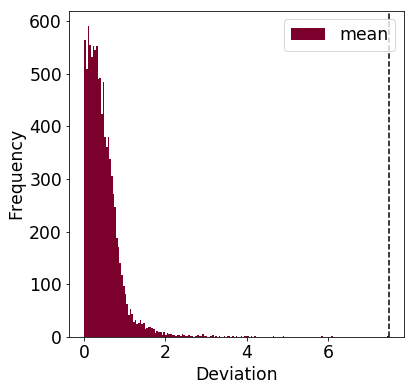

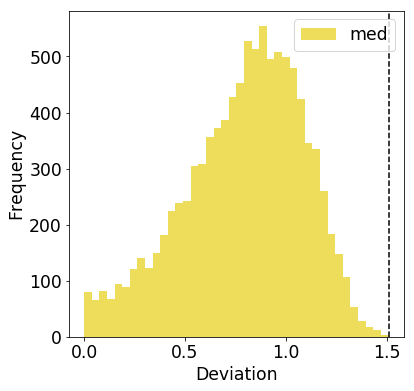

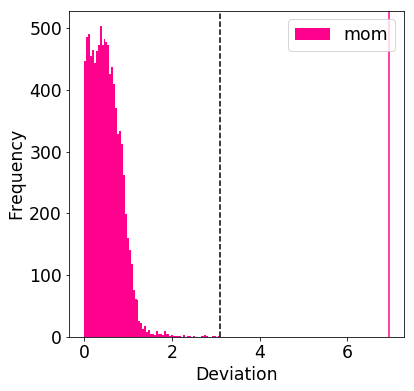

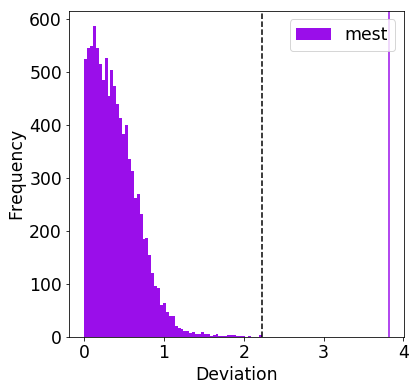

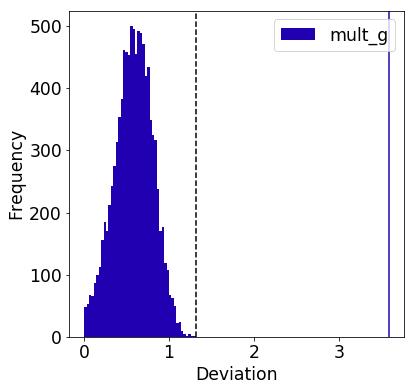

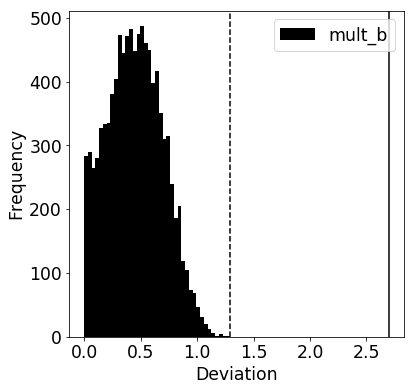

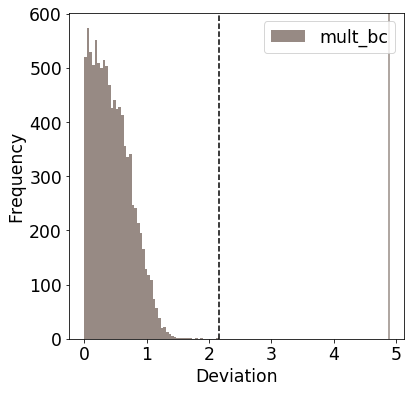

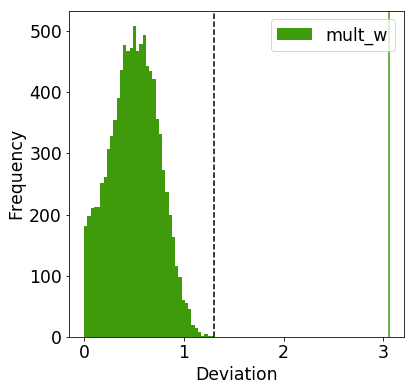

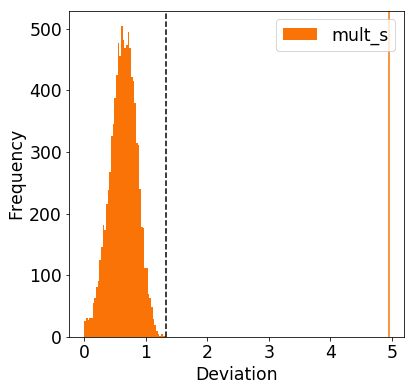

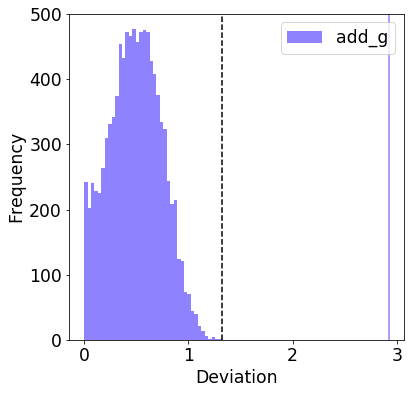

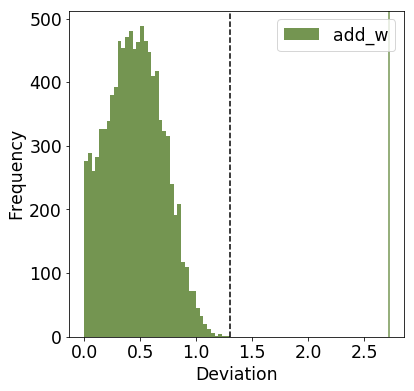

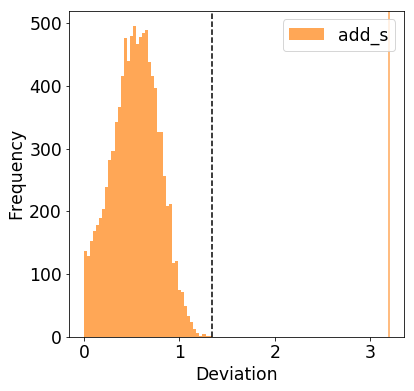

In [3]:
# Histograms; over methods, one plot per mth.
im_type = "hist"

# Compute all bounds.
true_paras = data.parse_data_ratio(distro=distro, level=level, ratio=ratio)[1]
mnt = true_paras["mnt"]
var = true_paras["var"]

bd_values = {"mean": None,
             "med": None,
             "mom":bd.mom(n=n, var=var, delta=cf._delta),
             "mest":bd.mest(n=n, var=var, delta=cf._delta),
             "mult_b": bd.mult_bernoulli(n=n, mnt=mnt, delta=cf._delta),
             "mult_bc": bd.mult_bernoulli_centered(n=n, mnt=mnt,
                                                       var=var, delta=cf._delta),
             "mult_g": bd.mult_gaussian(n=n, mnt=mnt, delta=cf._delta),
             "add_g": bd.add_gaussian(n=n, mnt=mnt, delta=cf._delta),
             "mult_w": bd.mult_weibull(n=n, mnt=mnt, delta=cf._delta),
             "mult_s": bd.mult_student(n=n, mnt=mnt, delta=cf._delta),
             "add_w": bd.add_weibull(n=n, mnt=mnt, delta=cf._delta),
             "add_s": bd.add_student(n=n, mnt=mnt, delta=cf._delta)}

todo_bounds = cf._mth_names


for mth_name in cf._mth_names:
    
    toread = methods.perf_filename(mth_name=mth_name, distro=distro, level=level, n=n)
    
    myfig = plt.figure(figsize=(6,6))
    ax = myfig.add_subplot(1,1,1)
    
    with open(os.path.join("results", toread), mode="r", encoding="ascii") as f:
        perf = np.loadtxt(fname=f, dtype=np.float, delimiter=",")
        vals = perf[ratio_idx,:]
        maxval = np.max(vals)
        ax.hist(vals, bins="auto", color=cf._mth_colors[mth_name], label=mth_name)
        ax.tick_params(labelsize=cf._fontsize)
        bd_value = bd_values[mth_name]
        if bd_value is not None:
            plt.axvline(x=bd_value, color=cf._mth_colors[mth_name])
        #for bd_name in todo_bounds:
        #    bd_value = bd_values[bd_name]
        #    if bd_value is not None:
        #        plt.axvline(x=bd_value, color=cf._mth_colors[bd_name])
        plt.axvline(x=maxval, linestyle="--", color="black")
        ax.legend(loc=1,ncol=1, fontsize=cf._fontsize)
        #plt.title("", size=cf._fontsize)ratio_idx
        plt.xlabel("Deviation", size=cf._fontsize)
        plt.ylabel("Frequency", size=cf._fontsize)
    
    # save image file.
    im_filename = "{}_{}_{}_idx{}_n{}_{}.pdf".format(im_type, distro, level, ratio_idx, n, mth_name)
    plt.savefig(fname=os.path.join(img_path, im_filename), bbox_inches="tight")
    plt.show()

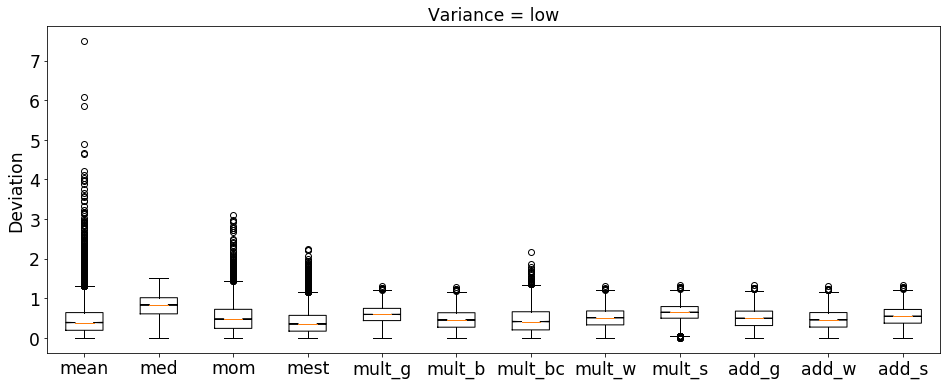

In [4]:
# Boxplots; over methods, all methods on one plot.
im_type = "box"

myfig = plt.figure(figsize=(16,6))

ax = myfig.add_subplot(1,1,1)

# Stack up the relevant results.
perf_tostack = []
for mth_name in cf._mth_names:
    
    toread = methods.perf_filename(mth_name=mth_name, distro=distro, level=level, n=n)
    
    with open(os.path.join("results", toread), mode="r", encoding="ascii") as f:
        perf = np.loadtxt(fname=f, dtype=np.float, delimiter=",")
    
    perf_tostack += [perf[ratio_idx,:]]
    
# Box-plot the stacked results.
ax.boxplot(x=np.vstack(perf_tostack).T, notch=True, labels=cf._mth_names)
ax.tick_params(labelsize=cf._fontsize)
plt.ylabel("Deviation", size=cf._fontsize)
plt.title("Variance = {}".format(level), size=cf._fontsize)

# save image file.
im_filename = "{}_{}_{}_idx{}_n{}.pdf".format(im_type, distro, level, ratio_idx, n)
plt.savefig(fname=os.path.join(img_path, im_filename), bbox_inches="tight")

plt.show()

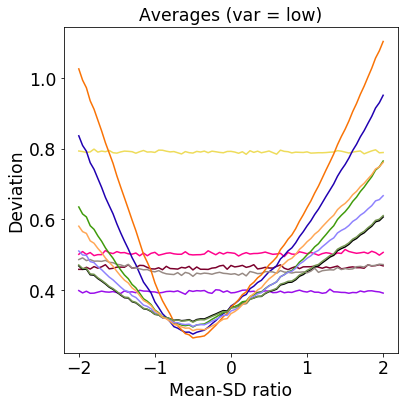

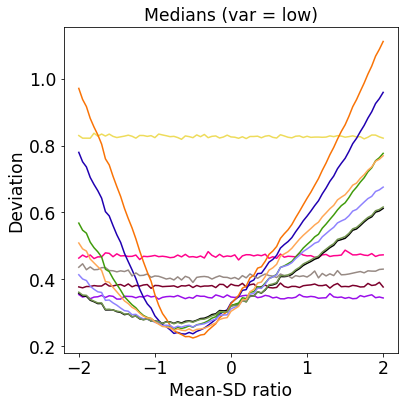

In [5]:
# Impact of ratio; averaged/median'd over all trials, and plotted for all methods.

im_type = "overratioAves"
myfig = plt.figure(figsize=(6,6))

ax = myfig.add_subplot(1,1,1)

for mth_name in cf._mth_names:
    
    toread = methods.perf_filename(mth_name=mth_name, distro=distro, level=level, n=n)
    
    with open(os.path.join("results", toread), mode="r", encoding="ascii") as f:
        perf = np.loadtxt(fname=f, dtype=np.float, delimiter=",")
    
    ax.plot(cf._ratios, np.mean(perf, axis=1), label=mth_name, color=cf._mth_colors[mth_name])
    
#ax.legend(loc="best",ncol=1, fontsize=cf._fontsize)
ax.tick_params(labelsize=cf._fontsize)
ax.set_title("Averages (var = {})".format(level), size=cf._fontsize)
ax.set_ylabel("Deviation", size=cf._fontsize)
ax.set_xlabel("Mean-SD ratio", size=cf._fontsize)

# save image file.
im_filename = "{}_{}_{}_idx{}_n{}.pdf".format(im_type, distro, level, ratio_idx, n)
plt.savefig(fname=os.path.join(img_path, im_filename), bbox_inches="tight")

plt.show()


im_type = "overratioMeds"
myfig = plt.figure(figsize=(6,6))

ax = myfig.add_subplot(1,1,1)

for mth_name in cf._mth_names:
    
    toread = methods.perf_filename(mth_name=mth_name, distro=distro, level=level, n=n)
    
    with open(os.path.join("results", toread), mode="r", encoding="ascii") as f:
        perf = np.loadtxt(fname=f, dtype=np.float, delimiter=",")
    
    ax.plot(cf._ratios, np.median(perf, axis=1), label=mth_name, color=cf._mth_colors[mth_name])
    
#ax.legend(loc="best",ncol=1, fontsize=cf._fontsize)
ax.tick_params(labelsize=cf._fontsize)
ax.set_title("Medians (var = {})".format(level), size=cf._fontsize)
ax.set_ylabel("Deviation", size=cf._fontsize)
ax.set_xlabel("Mean-SD ratio", size=cf._fontsize)

# save image file.
im_filename = "{}_{}_{}_idx{}_n{}.pdf".format(im_type, distro, level, ratio_idx, n)
plt.savefig(fname=os.path.join(img_path, im_filename), bbox_inches="tight")

plt.show()

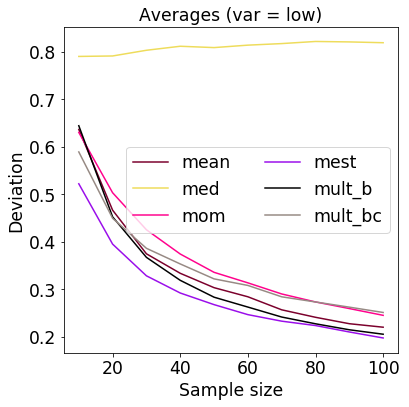

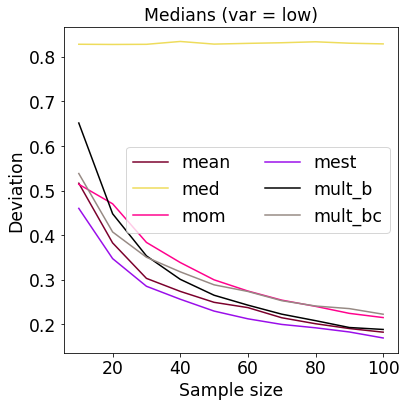

In [6]:
# Impact of sample size; fix mean level, and evaluate over several sample sizes.

TMP_TODO = ["mean", "med", "mom", "mest", "mult_b", "mult_bc"] #cf._mth_names

im_type = "overNAves"
myfig = plt.figure(figsize=(6,6))

ax = myfig.add_subplot(1,1,1)

for mth_name in TMP_TODO:
    
    tmp_perf = np.zeros((cf._nvals_len,), dtype=np.float32)
    
    for i in range(cf._nvals_len):
        
        m = cf._nvals[i]
        
        toread = methods.perf_filename(mth_name=mth_name, distro=distro, level=level, n=m)
        
        with open(os.path.join("results", toread), mode="r", encoding="ascii") as f:
            perf = np.loadtxt(fname=f, dtype=np.float, delimiter=",")
            tmp_perf[i] = np.mean(perf[ratio_idx,:])
    
    ax.plot(cf._nvals, tmp_perf, label=mth_name, color=cf._mth_colors[mth_name])
    
ax.legend(loc="best",ncol=2, fontsize=cf._fontsize)
ax.tick_params(labelsize=cf._fontsize)
ax.set_title("Averages (var = {})".format(level), size=cf._fontsize)
ax.set_ylabel("Deviation", size=cf._fontsize)
ax.set_xlabel("Sample size", size=cf._fontsize)

# save image file.
im_filename = "{}_{}_{}_idx{}.pdf".format(im_type, distro, level, ratio_idx, n)
plt.savefig(fname=os.path.join(img_path, im_filename), bbox_inches="tight")

plt.show()

im_type = "overNMeds"
myfig = plt.figure(figsize=(6,6))

ax = myfig.add_subplot(1,1,1)

for mth_name in TMP_TODO:
    
    tmp_perf = np.zeros((cf._nvals_len,), dtype=np.float32)
    
    for i in range(cf._nvals_len):
        
        m = cf._nvals[i]
        
        toread = methods.perf_filename(mth_name=mth_name, distro=distro, level=level, n=m)
        
        with open(os.path.join("results", toread), mode="r", encoding="ascii") as f:
            perf = np.loadtxt(fname=f, dtype=np.float, delimiter=",")
            tmp_perf[i] = np.median(perf[ratio_idx,:])
    
    ax.plot(cf._nvals, tmp_perf, label=mth_name, color=cf._mth_colors[mth_name])
    
ax.legend(loc="best",ncol=2, fontsize=cf._fontsize)
ax.tick_params(labelsize=cf._fontsize)
ax.set_title("Medians (var = {})".format(level), size=cf._fontsize)
ax.set_ylabel("Deviation", size=cf._fontsize)
ax.set_xlabel("Sample size", size=cf._fontsize)

# save image file.
im_filename = "{}_{}_{}_idx{}.pdf".format(im_type, distro, level, ratio_idx, n)
plt.savefig(fname=os.path.join(img_path, im_filename), bbox_inches="tight")

plt.show()

___